In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random
import time
#from nxsim import BaseNetworkAgent
from datetime import datetime
import collections
from collections import defaultdict
import copy
import math
nx.__version__

'2.2'

In [2]:
import copy
def make_graph(data): #make a graph out of the dataframe structure
    G = nx.Graph() #initialize the graph
    for index, row in data.iterrows():
        G.add_edge(row[1],row[2]) #add node1,node2,weight list iteratively to the graph
    
    return G

In [3]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (24, 12))
# Font size to 14
matplotlib.rc('font', size = 20)
# Add grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In [4]:
read_data = pd.read_csv("pnas.1713568115.sd01.txt") #read the data file, no cleaning required
read_data = read_data[read_data['trial'] == 1]  #take the data for the 1st trial only
data = read_data
data.head(10)
#print(len(data))
#type(data)



data['time'] = data['end'] - data['begin']#store the diff btw begin and end to get total time for each trans. in ms
data['time'] = data['time']/1000.0 #change 'ms' to 's'
#data['time'] = data['time'].map(lambda x: [x]) #convert the time attr to list as as there are multiple iteractions between two bees


In [5]:
data['begin'] = data['begin']/1000.0 #change 'ms' to 's'


data.head(10)

,trial,id1,id2,begin,end,time
0,1,201,219,1.373105e+09,1.373105e+12,2.000
1,1,201,219,1.373109e+09,1.373109e+12,42.000
2,1,201,242,1.373119e+09,1.373119e+12,2.000
3,1,201,242,1.373119e+09,1.373119e+12,2.999
4,1,201,255,1.372958e+09,1.372958e+12,41.999
5,1,201,259,1.372937e+09,1.372937e+12,15.000
6,1,201,259,1.373041e+09,1.373041e+12,3.000
7,1,201,259,1.373240e+09,1.373240e+12,8.000
8,1,201,262,1.373360e+09,1.373360e+12,27.999
9,1,201,263,1.373178e+09,1.373178e+12,2.000


In [6]:
data['day'] = data['begin'].map(lambda x: int(datetime.utcfromtimestamp(x).strftime('%d')))
data.head(10)

,trial,id1,id2,begin,end,time,day
0,1,201,219,1.373105e+09,1.373105e+12,2.000,6
1,1,201,219,1.373109e+09,1.373109e+12,42.000,6
2,1,201,242,1.373119e+09,1.373119e+12,2.000,6
3,1,201,242,1.373119e+09,1.373119e+12,2.999,6
4,1,201,255,1.372958e+09,1.372958e+12,41.999,4
5,1,201,259,1.372937e+09,1.372937e+12,15.000,4
6,1,201,259,1.373041e+09,1.373041e+12,3.000,5
7,1,201,259,1.373240e+09,1.373240e+12,8.000,7
8,1,201,262,1.373360e+09,1.373360e+12,27.999,9
9,1,201,263,1.373178e+09,1.373178e+12,2.000,7


In [7]:
data['UTC'] = data['begin'].map(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
data.head(10)

,trial,id1,id2,begin,end,time,day,UTC
0,1,201,219,1.373105e+09,1.373105e+12,2.000,6,2013-07-06 10:05:05
1,1,201,219,1.373109e+09,1.373109e+12,42.000,6,2013-07-06 11:14:59
2,1,201,242,1.373119e+09,1.373119e+12,2.000,6,2013-07-06 13:56:42
3,1,201,242,1.373119e+09,1.373119e+12,2.999,6,2013-07-06 13:57:10
4,1,201,255,1.372958e+09,1.372958e+12,41.999,4,2013-07-04 17:14:29
5,1,201,259,1.372937e+09,1.372937e+12,15.000,4,2013-07-04 11:28:14
6,1,201,259,1.373041e+09,1.373041e+12,3.000,5,2013-07-05 16:11:35
7,1,201,259,1.373240e+09,1.373240e+12,8.000,7,2013-07-07 23:33:29
8,1,201,262,1.373360e+09,1.373360e+12,27.999,9,2013-07-09 08:54:53
9,1,201,263,1.373178e+09,1.373178e+12,2.000,7,2013-07-07 06:25:01


In [8]:
data['hours'] = data['begin'].map(lambda x: int(datetime.utcfromtimestamp(x).strftime('%H')))
data.head(10)

,trial,id1,id2,begin,end,time,day,UTC,hours
0,1,201,219,1.373105e+09,1.373105e+12,2.000,6,2013-07-06 10:05:05,10
1,1,201,219,1.373109e+09,1.373109e+12,42.000,6,2013-07-06 11:14:59,11
2,1,201,242,1.373119e+09,1.373119e+12,2.000,6,2013-07-06 13:56:42,13
3,1,201,242,1.373119e+09,1.373119e+12,2.999,6,2013-07-06 13:57:10,13
4,1,201,255,1.372958e+09,1.372958e+12,41.999,4,2013-07-04 17:14:29,17
5,1,201,259,1.372937e+09,1.372937e+12,15.000,4,2013-07-04 11:28:14,11
6,1,201,259,1.373041e+09,1.373041e+12,3.000,5,2013-07-05 16:11:35,16
7,1,201,259,1.373240e+09,1.373240e+12,8.000,7,2013-07-07 23:33:29,23
8,1,201,262,1.373360e+09,1.373360e+12,27.999,9,2013-07-09 08:54:53,8
9,1,201,263,1.373178e+09,1.373178e+12,2.000,7,2013-07-07 06:25:01,6


In [9]:
data = data.sort_values('begin')
data.head(20)

,trial,id1,id2,begin,end,time,day,UTC,hours
102932,1,612,1697,1.372829e+09,1.372829e+12,3.000,3,2013-07-03 05:29:18,5
138807,1,740,829,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:29:23,5
225447,1,1138,1305,1.372829e+09,1.372829e+12,5.999,3,2013-07-03 05:29:32,5
11636,1,267,876,1.372829e+09,1.372829e+12,11.000,3,2013-07-03 05:29:41,5
126121,1,701,912,1.372829e+09,1.372829e+12,10.000,3,2013-07-03 05:29:41,5
119604,1,667,1460,1.372829e+09,1.372829e+12,17.000,3,2013-07-03 05:29:49,5
189002,1,938,1322,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:29:52,5
243670,1,1248,1657,1.372829e+09,1.372829e+12,4.000,3,2013-07-03 05:30:18,5
234946,1,1205,1593,1.372829e+09,1.372829e+12,16.999,3,2013-07-03 05:30:25,5
21359,1,288,643,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:30:25,5


In [10]:
diameter_list = []
ass_list = []
clustering_list = []
avg_degree_list = []
mean_deg_list = []
for day in range(4,13):
    diameter_h_list = []
    ass_h_list = []
    clustering_h_list = []
    mean_deg_h_list = []
    avg_degree_h_list = []
    day_data = data[data['day'] == day] #get data for each day
    for hour in range(0,24): #for each hour, compute n/w stats
        hour_data = day_data[day_data['hours'].isin([x for x in range(0,hour+1)])]
        G = make_graph(hour_data)
        degrees = dict(G.degree())
        sum_of_edges = sum(degrees.values())
        mean_degree = sum_of_edges/len(degrees)
        mean_deg_h_list.append(mean_degree)
        avg_degree_h_list.append(nx.average_degree_connectivity(G))
        ass_h_list.append(nx.degree_assortativity_coefficient(G))
        clustering_h_list.append(nx.average_clustering(G))
   
    ass_list.append(ass_h_list)
    clustering_list.append(clustering_h_list)
    avg_degree_list.append(avg_degree_h_list)
    mean_deg_list.append(mean_deg_h_list)
    print(day)
    

4
5
6
7
8
9
10
11
12


In [23]:
def line_plotting(li,xlabel,ylabel):
    for i in range(len(li)):
        x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
        plt.plot(x, li[i],label='day '+str(i))
    plt.rcParams["figure.figsize"] = [20,10]
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    plt.show()

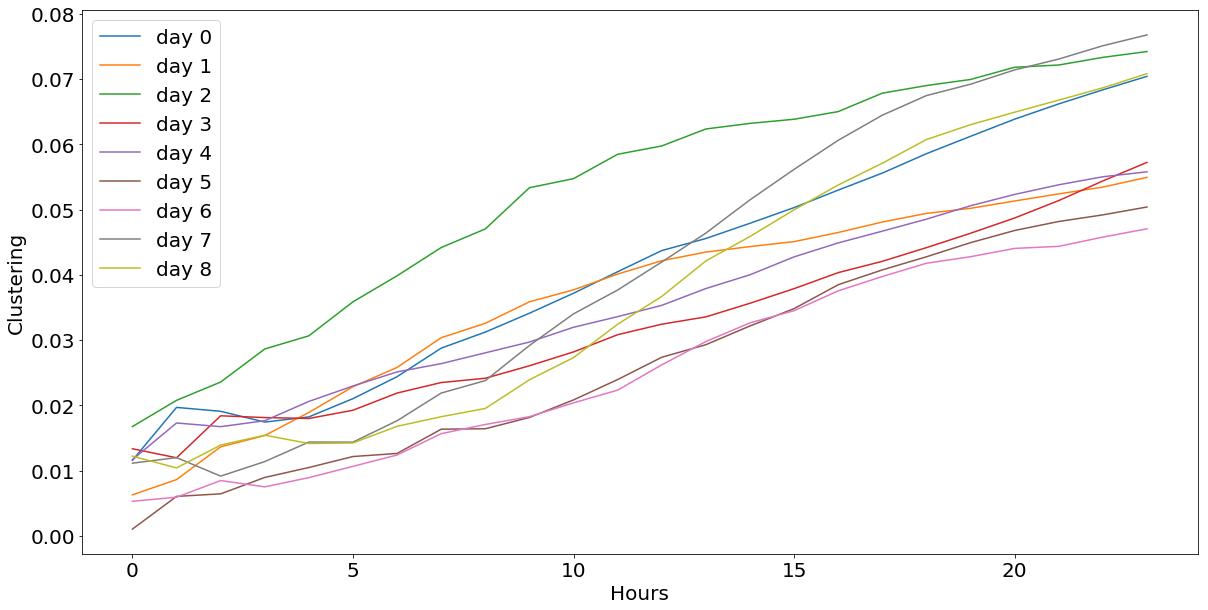

In [24]:
line_plotting(clustering_list,"Hours","Clustering")

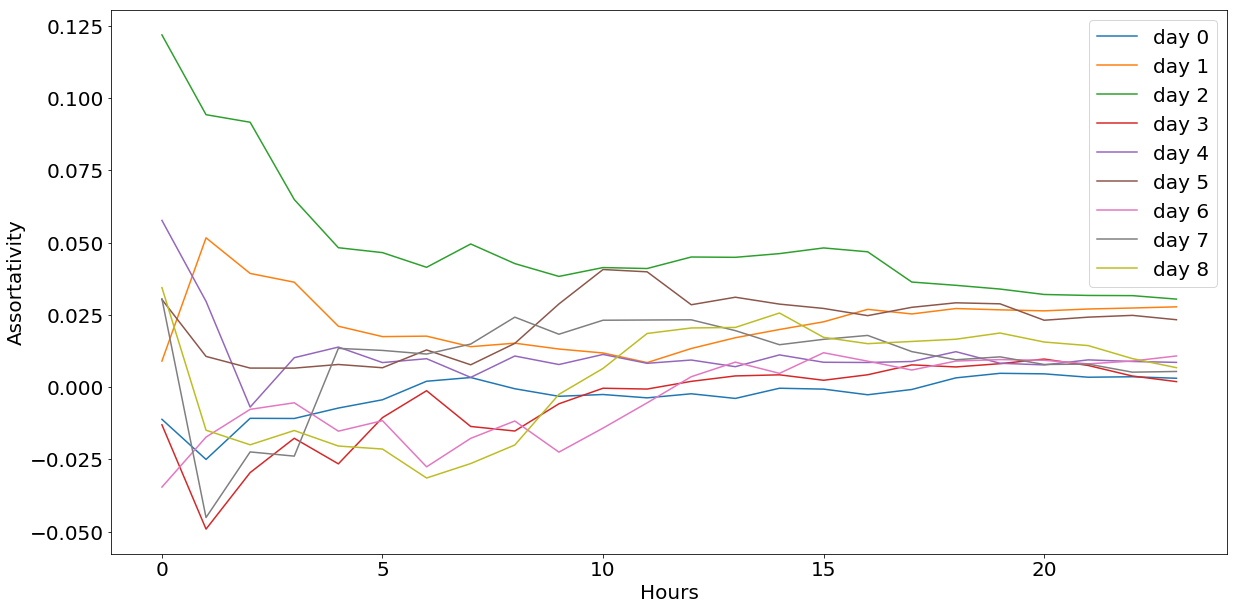

In [28]:
line_plotting(ass_list,"Hours","Assortativity")

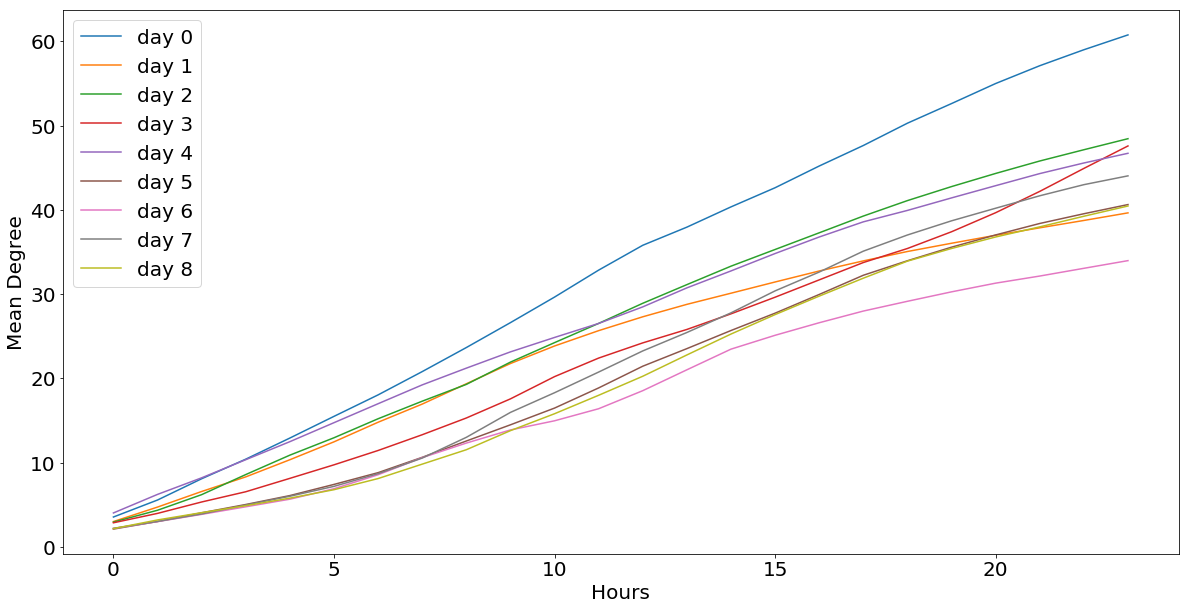

In [27]:
line_plotting(mean_deg_list,"Hours","Mean Degree")

In [35]:
print(avg_degree_list[0][0])

{5: 5.8307692307692305, 7: 5.54054054054054, 1: 5.398104265402844, 4: 5.459239130434782, 2: 5.605769230769231, 3: 5.444444444444445, 6: 5.522875816993464, 12: 5.5, 8: 5.820652173913044, 9: 5.176470588235294, 11: 5.254545454545455, 10: 5.409090909090909, 14: 4.821428571428571, 15: 5.044444444444444, 13: 6.076923076923077, 16: 5.0625, 17: 5.882352941176471}


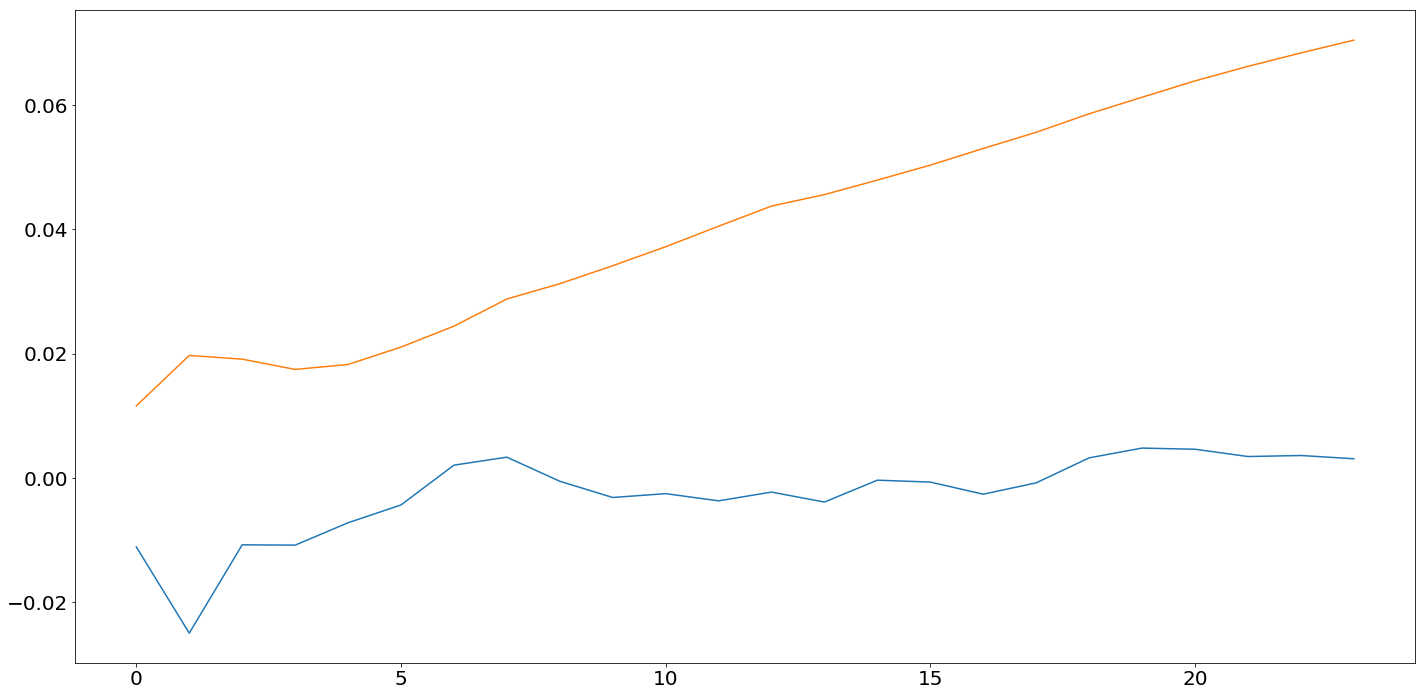

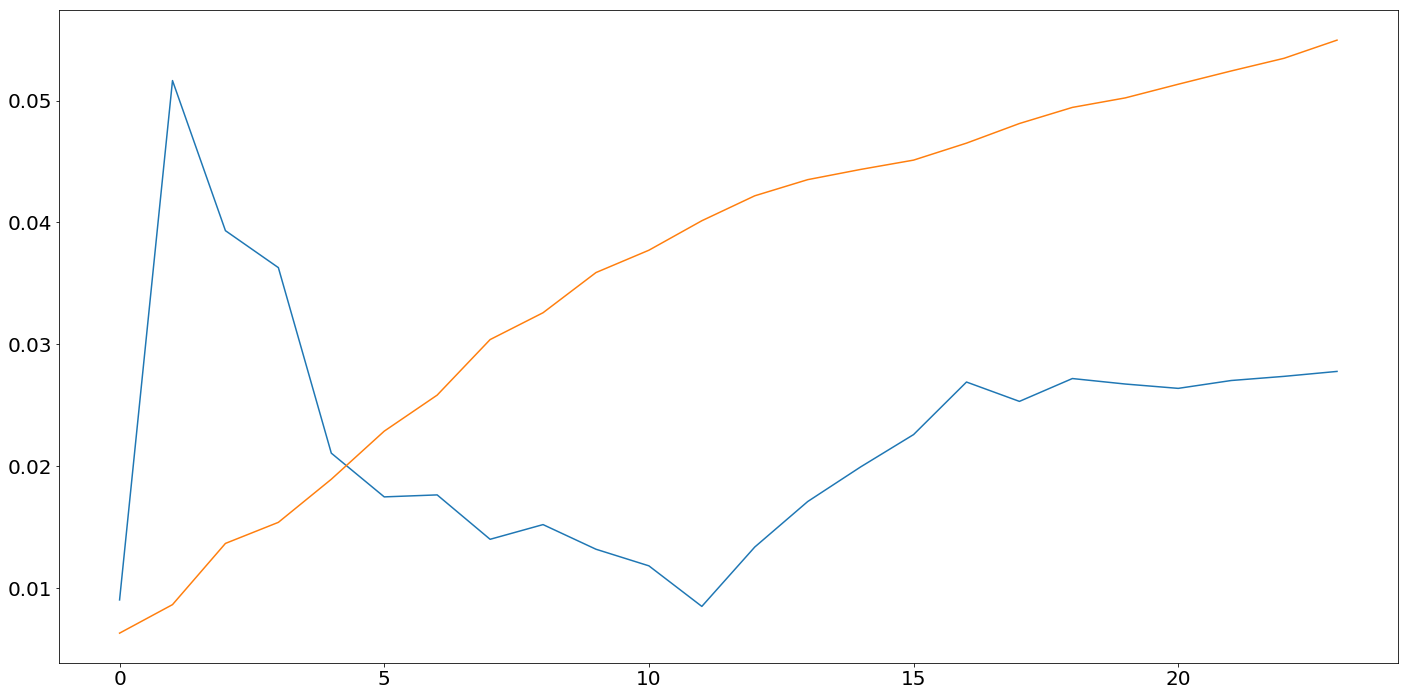

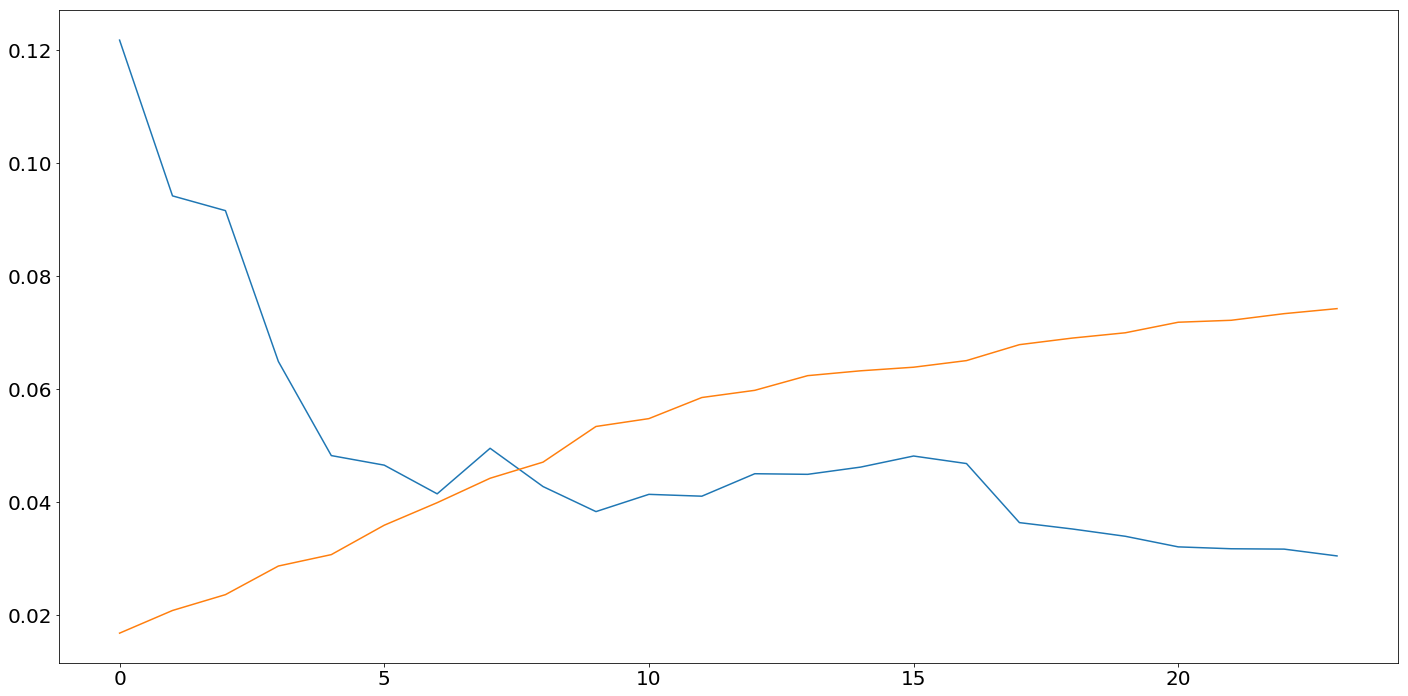

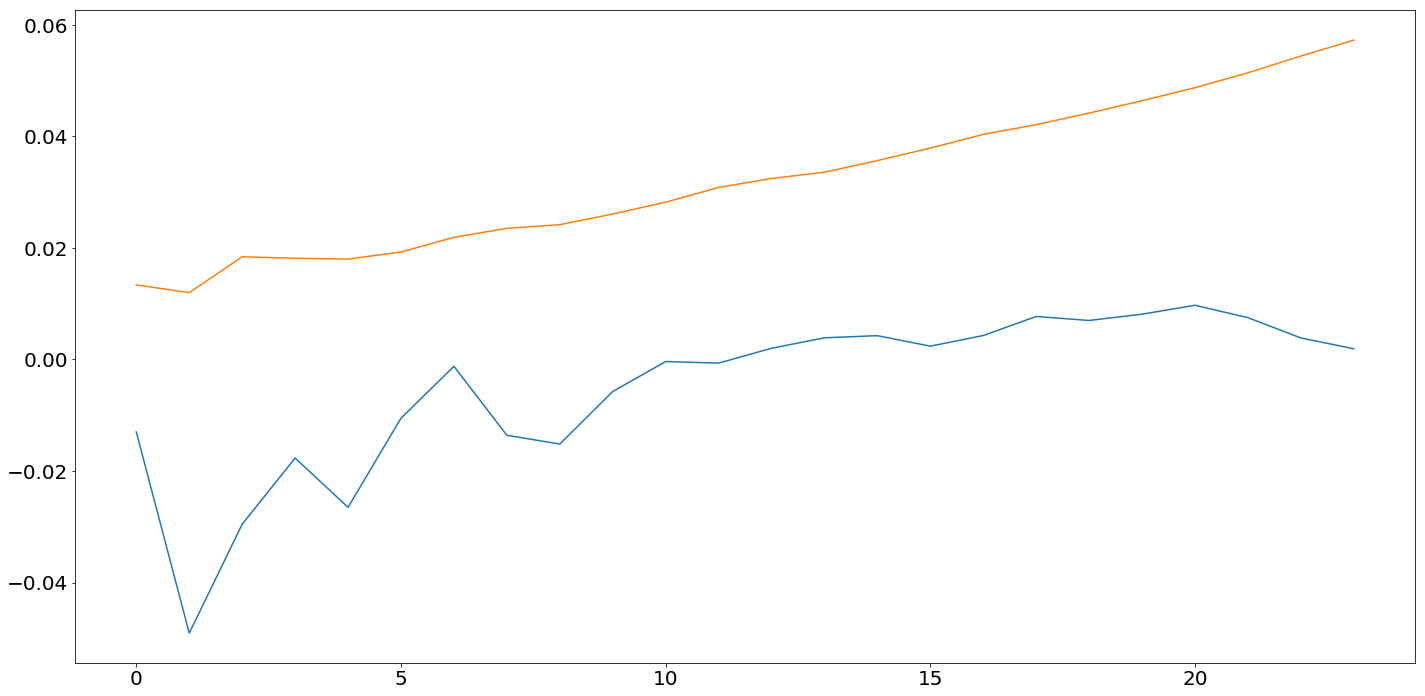

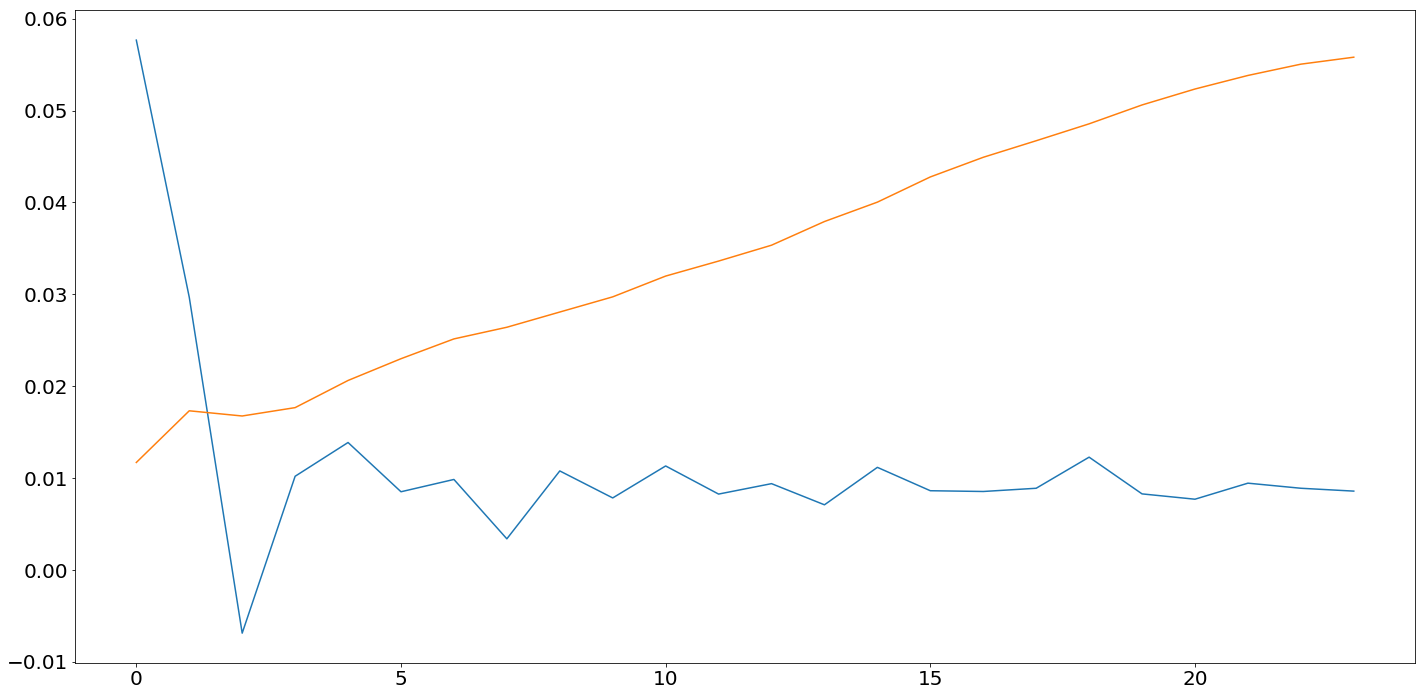

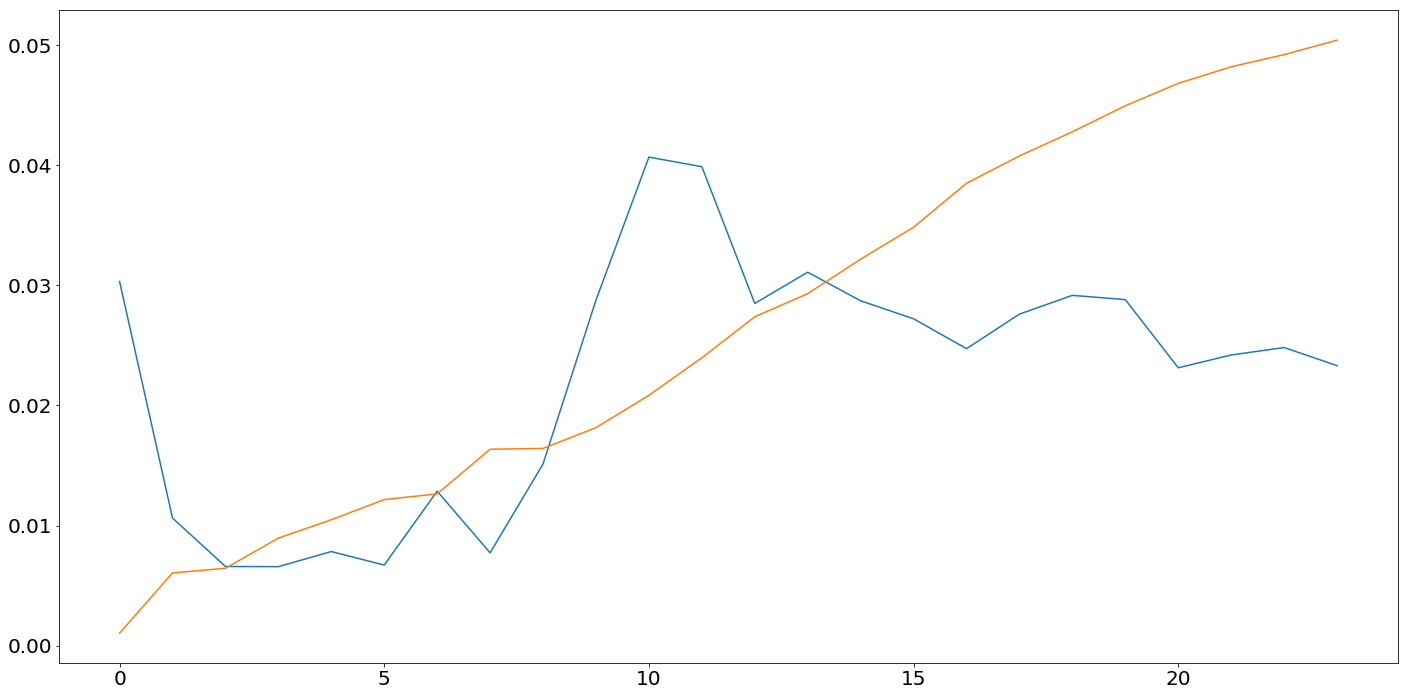

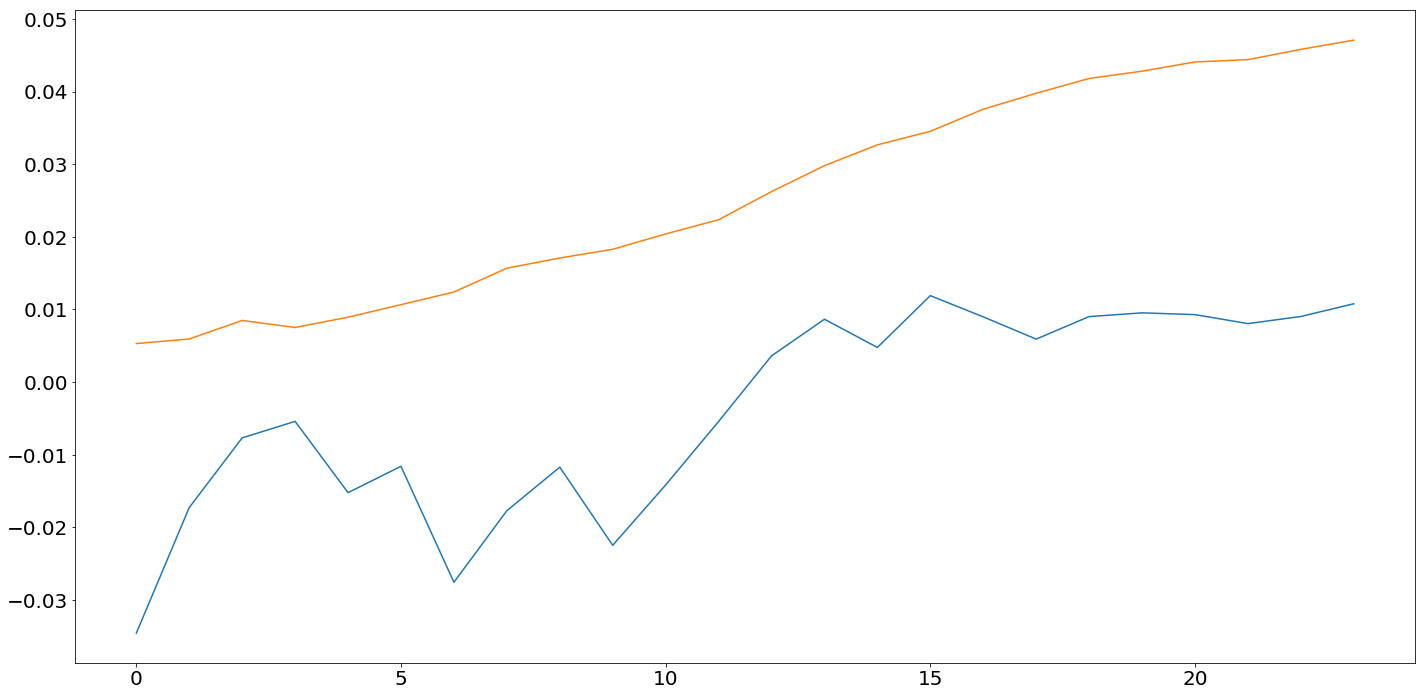

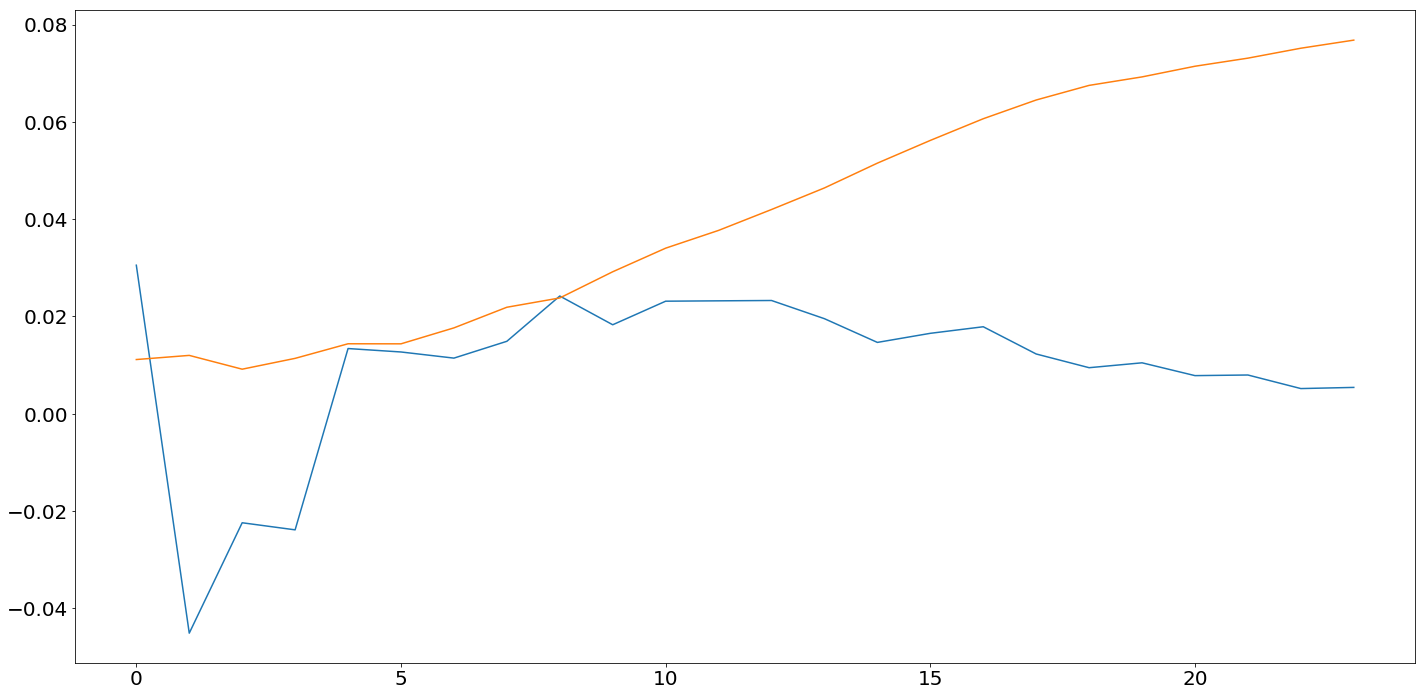

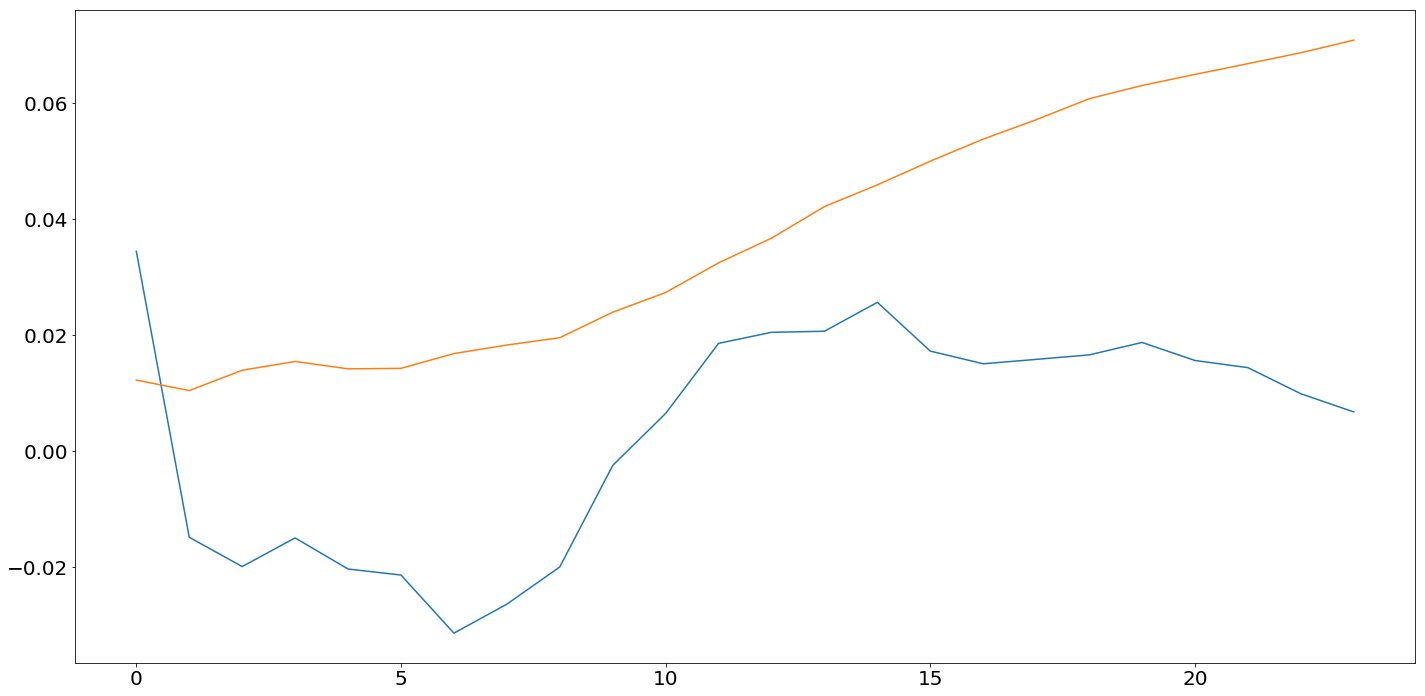

In [11]:
x = [i for i in range(0,24)]
c = 0
for day in range(4,13):
    plt.plot(x,ass_list[c])
    plt.plot(x,clustering_list[c])
    c+=1
    plt.show()